In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Student Stress Factors (2).csv")
data


,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3
...,...,...,...,...,...,...
515,3,2,4,2,3,1
516,2,4,3,2,1,2
517,2,3,5,1,5,2
518,3,4,3,5,2,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  520 non-null    int64
 1   How many times a week do you suffer headaches 🤕?                  520 non-null    int64
 2   How would you rate you academic performance 👩‍🎓?                  520 non-null    int64
 3   how would you rate your study load?                               520 non-null    int64
 4   How many times a week you practice extracurricular activities 🎾?  520 non-null    int64
 5   How would you rate your stress levels?                            520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


In [4]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  520 non-null    int64
 1   How many times a week do you suffer headaches 🤕?                  520 non-null    int64
 2   How would you rate you academic performance 👩‍🎓?                  520 non-null    int64
 3   how would you rate your study load?                               520 non-null    int64
 4   How many times a week you practice extracurricular activities 🎾?  520 non-null    int64
 5   How would you rate your stress levels?                            520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(['How would you rate your stress levels?'], axis=1)
y = data['How would you rate your stress levels?']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [7]:
train_data = X_train.join(y_train)

In [8]:
train_data

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
336,5,1,4,2,1,1
204,2,4,3,2,1,2
81,3,1,3,1,2,2
129,3,1,3,2,2,1
9,1,2,3,2,5,2
...,...,...,...,...,...,...
218,2,3,5,5,2,4
223,2,3,3,5,3,4
271,3,4,3,5,5,5
474,5,2,4,4,4,2


array([[<Axes: title={'center': 'Kindly Rate your Sleep Quality 😴'}>,
        <Axes: title={'center': 'How many times a week do you suffer headaches 🤕?'}>],
       [<Axes: title={'center': 'How would you rate you academic performance 👩\u200d🎓?'}>,
        <Axes: title={'center': 'how would you rate your study load?'}>],
       [<Axes: title={'center': 'How many times a week you practice extracurricular activities 🎾?'}>,
        <Axes: title={'center': 'How would you rate your stress levels?'}>]],
      dtype=object)

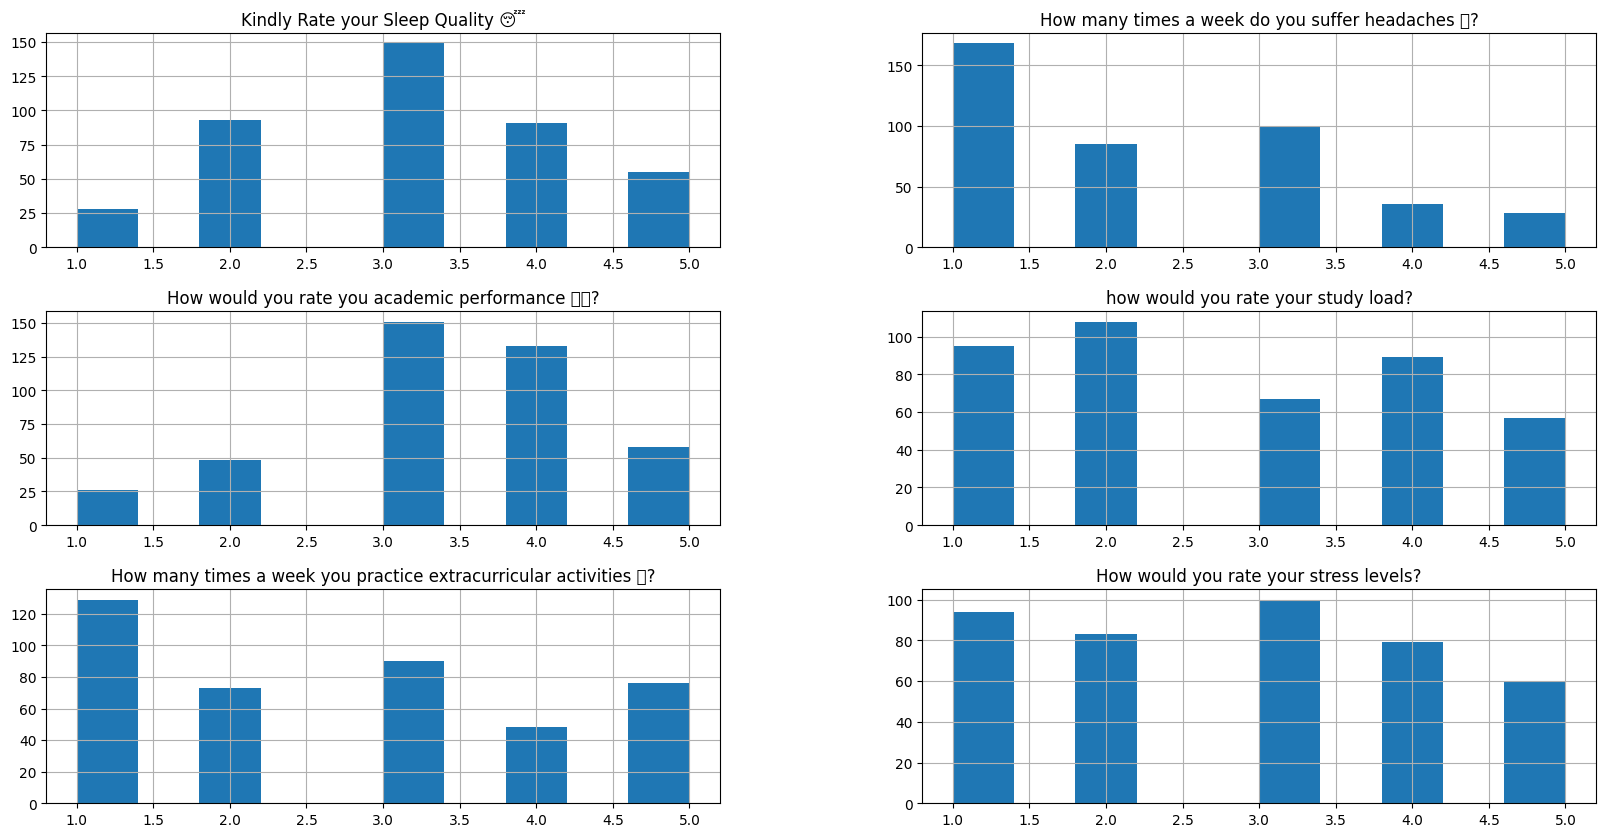

In [9]:
train_data.hist(figsize=(20,10))

<Axes: >

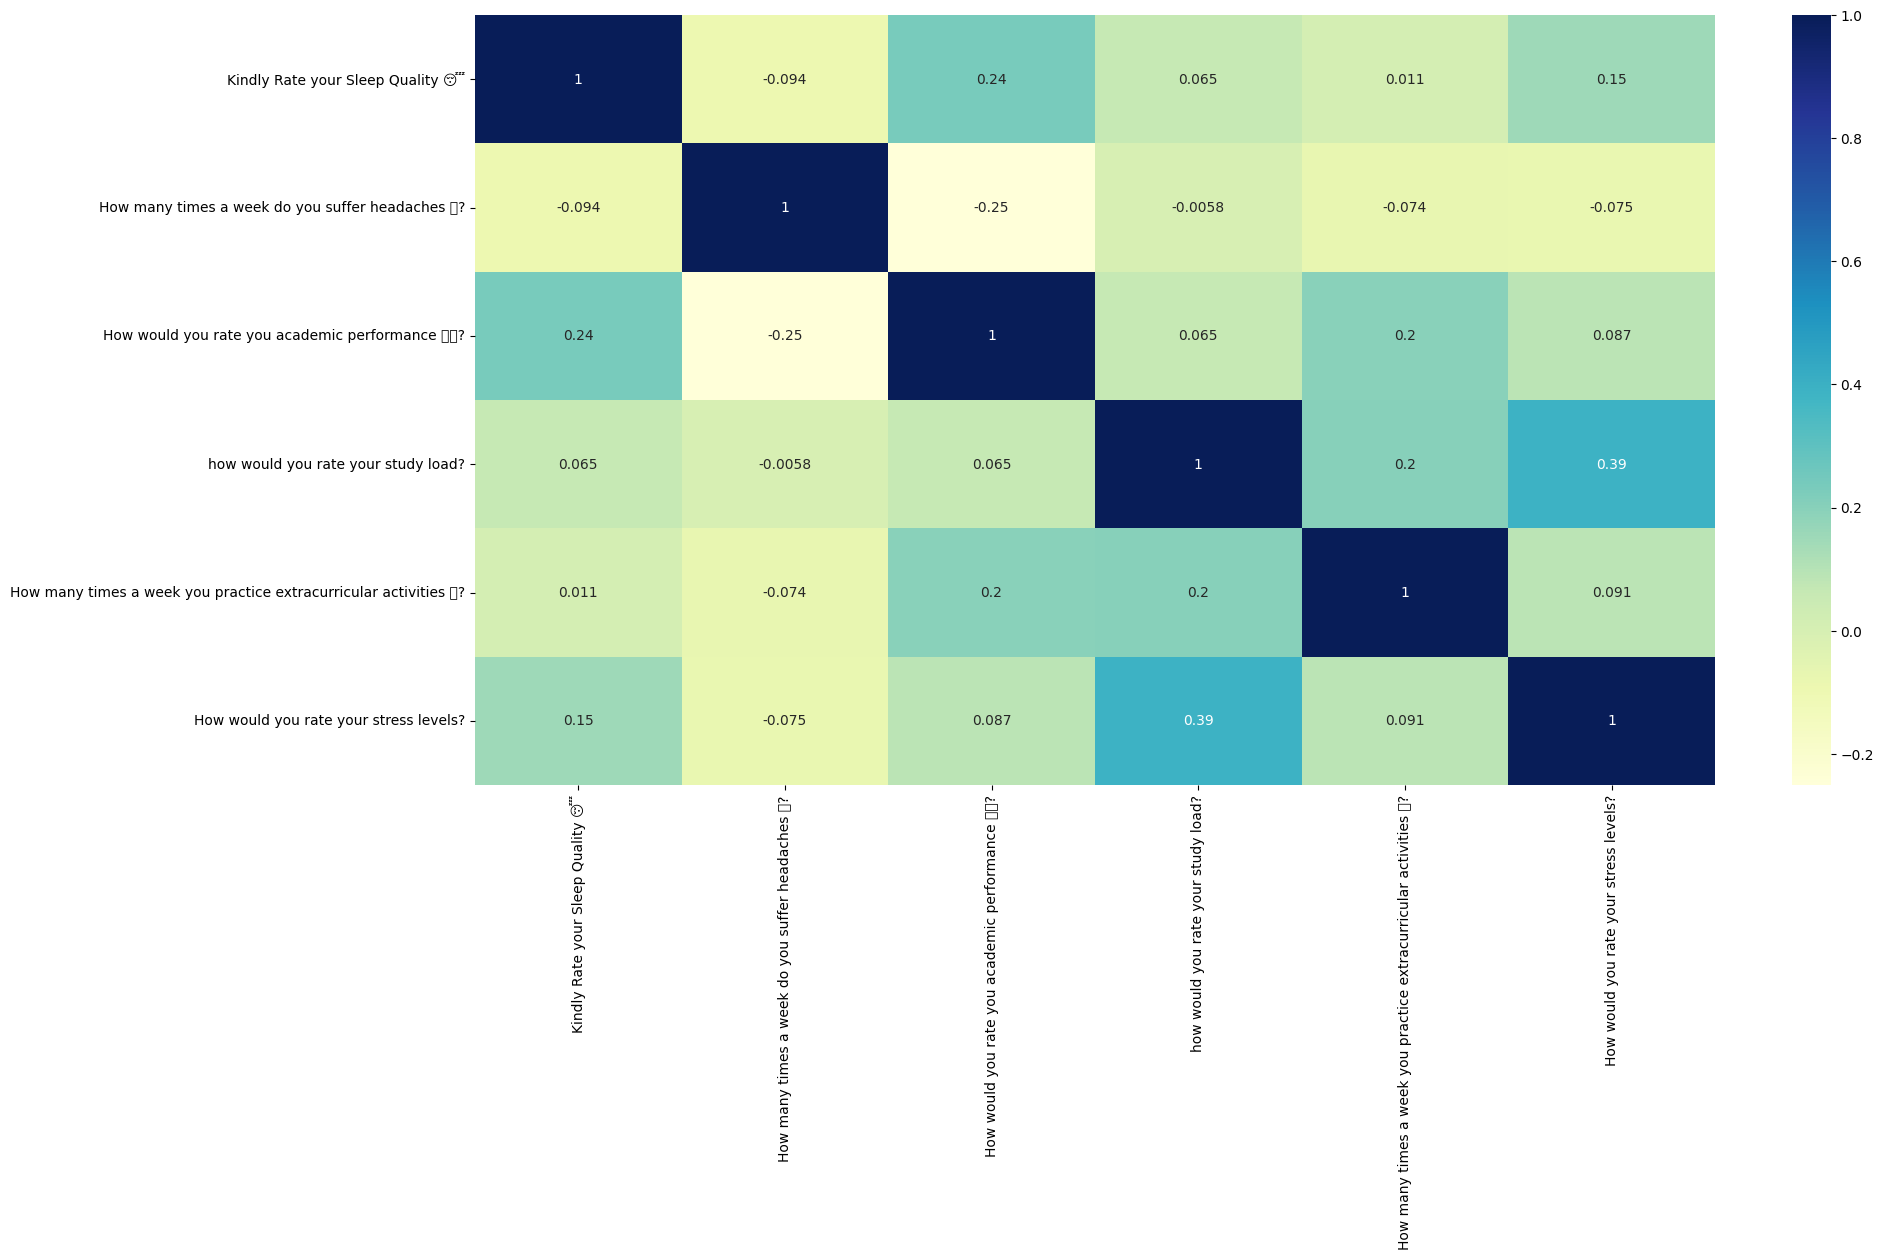

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(), annot=True,cmap="YlGnBu")

In [11]:

X_train, y_train = train_data.drop(['How would you rate your stress levels?'], axis=1), train_data['How would you rate your stress levels?']



In [12]:
test_data = X_test.join(y_test)
X_test, y_test = test_data.drop(['How would you rate your stress levels?'], axis=1), test_data['How would you rate your stress levels?']



In [13]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
forest.score(X_test, y_test)

0.9540658956047228

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [245,250,243],
    "bootstrap": [False],
    "warm_start":[True],
    "min_weight_fraction_leaf":[0,1,2],
    "max_features": [350],
    "max_leaf_nodes":[None],
    "max_depth":[18],
    "n_jobs":[1],
    "oob_score":[False],
    "min_samples_leaf":[1],
    "min_impurity_decrease":[0],
    "min_samples_split":[2],
    "random_state":[24]
}

grid_search = GridSearchCV(forest, param_grid,
                           return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_,grid_search.best_score_

({'bootstrap': False,
  'max_depth': 18,
  'max_features': 350,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0,
  'n_estimators': 245,
  'n_jobs': 1,
  'oob_score': False,
  'random_state': 24,
  'warm_start': True},
 0.9180973269257086)

In [16]:
best_forest = grid_search.best_estimator_

In [17]:
best_forest.score(X_test, y_test)

0.9593267483806761

In [18]:
input_data = (4,1,3,2,5)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,5)

prediction = best_forest.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 3):
  print('The person has kind of stress but not much')
elif(prediction[0] < 3):
  print('The person is not stressful')
elif(prediction[0] > 3):
  print('The person is highly stressful')

[3.25]
The person is highly stressful


In [19]:
import pickle

In [22]:
filename = 'trained_model.pickle'
pickle.dump(best_forest, open(filename, 'wb'))

In [23]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.pickle', 'rb'))

In [24]:
input_data = (4,1,3,2,5)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,5)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 3):
  print('The person has kind of stress but not much')
elif(prediction[0] < 3):
  print('The person is not stressful')
elif(prediction[0] > 3):
  print('The person is highly stressful')

[3.25]
The person is highly stressful
